# Анализ убытков приложения ProcrastinatePRO+

**Описание проекта**

Несмотря на огромные вложения в рекламу, развлекательное приложение `Procrastinate Pro+` в последние несколько месяцев терпит убытки. Стоит разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

 
    
**Задачи**

В проекте предстоит изучить:
- Откуда приходят пользователи и какими устройствами они пользуются,
- Сколько стоит привлечение пользователей из различных рекламных каналов;
- Сколько денег приносит каждый клиент,
- Когда расходы на привлечение клиента окупаются,
- Какие факторы мешают привлечению клиентов. 

**Структура проекта**

- [Загрузка и описание данных;](#review)
- [Предобработка данных;](#preprocessing)
- [Исследовательский анализ данных;](#analysis)
- [Маркетинг;](#marketing)
- [Оценка окупаемость рекламы;](#payback)
- [Общий вывод.](#results)




### Загрузка  и описание данных  
<a id='review'></a>

**Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

**Информация о посещениях сайта - visits**

Структура:

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

In [2]:
visits = pd.read_csv('visits_info_short.csv')
display(visits.head(),visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


None

Данные содержат 6 столбцов и 309901 строку. Типы данных, представленные в таблице - `int64` и `object`. Данные в столбцах с датами начала и конца сессий  покупки `Session Start` и `Session End` следует привести к типу `datetime`.  Пропусков в данных нет.

**Информация о заказах - orders**

Структура:

- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

In [3]:
orders = pd.read_csv('orders_info_short.csv')
display(orders.head(),orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


None

Данные содержат 3 столбца и 40212 строк. Типы данных, представленные в таблице - `int64`,`object` и `float64`. Данные в столбце с датой покупки `Event Dt` следует привести к типу `datetime`.  Пропусков в данных нет.

**Информация о расходах на рекламу - costs**

Структура:

- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

In [4]:
costs = pd.read_csv('costs_info_short.csv')
display(costs.head(), costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


None

Данные содержат 3 столбца и 1800 строк. Типы данных, представленные в таблице - `object` и `float64`. Данные в столбце с датой проведения рекламной компании `dt` следует привести к типу `datetime`.  Пропусков в данных нет. 

#### Предобработка данных  
<a id='preprocessing'></a>

#####  Переименование столбцов
В наименованиях столбцов  присутствуют заглавные буквы и нет змеиного регистра. Исправим это.

In [5]:
visits.columns = visits.columns.str.lower().str.replace(' ','_')
display(visits.columns) 

orders.columns = orders.columns.str.lower().str.replace(' ','_')
display(orders.columns)

costs.columns = costs.columns.str.lower()
costs.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

##### Типы данных

Во всех датафреймах есть столбцы, содержащие даты. Для дальнейшей работы данные в них приведем к типу `datetime`.

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

##### Работа с дубликатами

Проверим наличие явных дубликатов в датафреймах.

In [7]:
visits.duplicated().sum()

0

In [8]:
orders.duplicated().sum()

0

In [9]:
costs.duplicated().sum()

0

Явных дубликатов в данных не обнаружено, проверим наличие неявных дубликатов в столбцах, содержащих строковые значения.

In [10]:
display(visits['region'].unique().tolist())
display(visits['device'].unique().tolist())
display(visits['channel'].unique().tolist())
costs['channel'].unique().tolist()

['United States', 'UK', 'France', 'Germany']

['iPhone', 'Mac', 'Android', 'PC']

['organic',
 'TipTop',
 'RocketSuperAds',
 'YRabbit',
 'FaceBoom',
 'MediaTornado',
 'AdNonSense',
 'LeapBob',
 'WahooNetBanner',
 'OppleCreativeMedia',
 'lambdaMediaAds']

['FaceBoom',
 'MediaTornado',
 'RocketSuperAds',
 'TipTop',
 'YRabbit',
 'AdNonSense',
 'LeapBob',
 'OppleCreativeMedia',
 'WahooNetBanner',
 'lambdaMediaAds']

Неявные дубликаты не обнаружены. 

#####  Добавление в таблицу новых столбцов

Добавим в таблицу `costs` столбец с порядковым номером недели и месяцем проведения рекламной компании

In [11]:
costs['week'] = costs['dt'].astype('datetime64[W]') 

costs['month'] = costs['dt'].astype('datetime64[M]') 

costs


,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,2019-04-25,2019-05-01
1,2019-05-02,FaceBoom,78.1,2019-05-02,2019-05-01
2,2019-05-03,FaceBoom,85.8,2019-05-02,2019-05-01
3,2019-05-04,FaceBoom,136.4,2019-05-02,2019-05-01
4,2019-05-05,FaceBoom,122.1,2019-05-02,2019-05-01
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-17,2019-10-01
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-24,2019-10-01
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-24,2019-10-01
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-24,2019-10-01


### Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик

**`get_profiles()` — функция для создания профилей пользователей**

In [12]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    ad_costs['dt'] = pd.to_datetime(costs['dt']).dt.date

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]').dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**`get_retention()` — функция для подсчёта Retention Rate**

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**`get_conversion()` — функция для подсчёта конверсии**

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**`get_ltv()` — функция для подсчёта LTV и ROI**

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков

**`filter_data()` — функция для сглаживания данных**

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**`plot_retention()` — функция для построения графика Retention Rate**

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        ))
    
    plt.tight_layout()
    plt.show() 

**`plot_conversion()` — функция для построения графика конверсии**

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**`plot_ltv_roi()` — функция для визуализации LTV и ROI**


In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    
    

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных 
<a id='analysis'></a>

#### Составление профилей пользователей. 

Составим профили пользователей с помощью функции `get_profiles()`.

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769


Таблица с пользовательскими профилями готова. 

Она содержит:
- `user_id` - идентификатор пользователя,
-  `first_ts` - информация о дате и времени первого посещения, 
- `channel` - канал привлечения клиента, 
- `device` - тип устройства, 
- `region` - страна пользователя, 
-  `dt` - дата первого посещения,
- `month` - месяц первого посещения,
- `payer` - информация о том, является ли пользователь "платящим",
- `acquisition_cost` - стоимость привлечения пользователя.

Определим минимальную и максимальную даты привлечения пользователей.

In [21]:
max_ts = max(profiles['first_ts'])
min_ts = min(profiles['first_ts'])

display(min_ts,max_ts)


Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

Данные содержат информацию о пользователях, привлечённых с 1 мая по 27 октября 2019 года

Напишем функцию для составления сводной таблицы с количеством пользователей и долей платящих пользователей в разбивке по разным критериям, а также для построения круговых диаграмм.

In [22]:
#Функция для составления сводной таблицы и круговых диаграмм
def pivot_and_pie(table,criterion):
    pivot_region = table.groupby(criterion).agg({'user_id':'count',
                                                 'payer':'sum'}).rename(columns={'user_id':'count_users',
                                                                                 'payer':'paying_users'})
    pivot_region['share_of_paying_users (%)'] = pivot_region['count_users']/pivot_region['paying_users']
    
    display(pivot_region)

    plt.figure(figsize=(20,20))

    plt.subplot(1, 2, 1)
    plt.pie(pivot_region['count_users'],
        autopct='%1.2f%%',
        labels=pivot_region['count_users'].index)
    plt.title(f'Количество пользователей в разбивке по {criterion}')

    plt.subplot(1, 2, 2)
    plt.pie(pivot_region['paying_users'],
    autopct='%1.2f%%',

    labels=pivot_region['count_users'].index)
    plt.title(f'Количество плятящих пользователей в разбивке по {criterion}')
    plt.legend(bbox_to_anchor=( 1.00 , 1 ))
    plt.show()
    
    #доля платящих пользователей
    s = pivot_region['share_of_paying_users (%)'].sort_values(ascending=False)
    n = pivot_region['share_of_paying_users (%)'].sort_values(ascending=False).index
    fig, ax = plt.subplots(figsize=(20,8))
    bar = plt.bar(n,s, color='g')
    
    for i in range(len(s)):
        plt.annotate('{:.2f}%'.format(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')
    plt.title(f'Доля плятящих пользователей в разбивке по {criterion}')
    plt.xlabel(f'{criterion}')
    plt.ylabel('Процент платящих пользователей от всех привлеченных')
    plt.show()



**Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны**

,count_users,paying_users,share_of_paying_users (%)
region,,,
France,17450,663,26.319759
Germany,14981,616,24.319805
UK,17575,700,25.107143
United States,100002,6902,14.488844


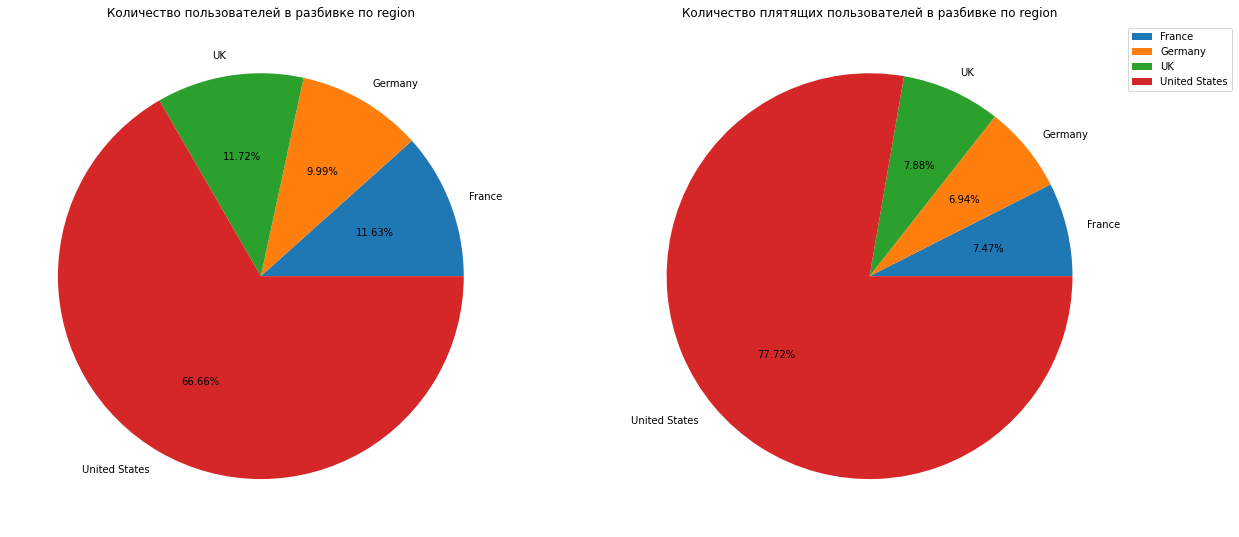

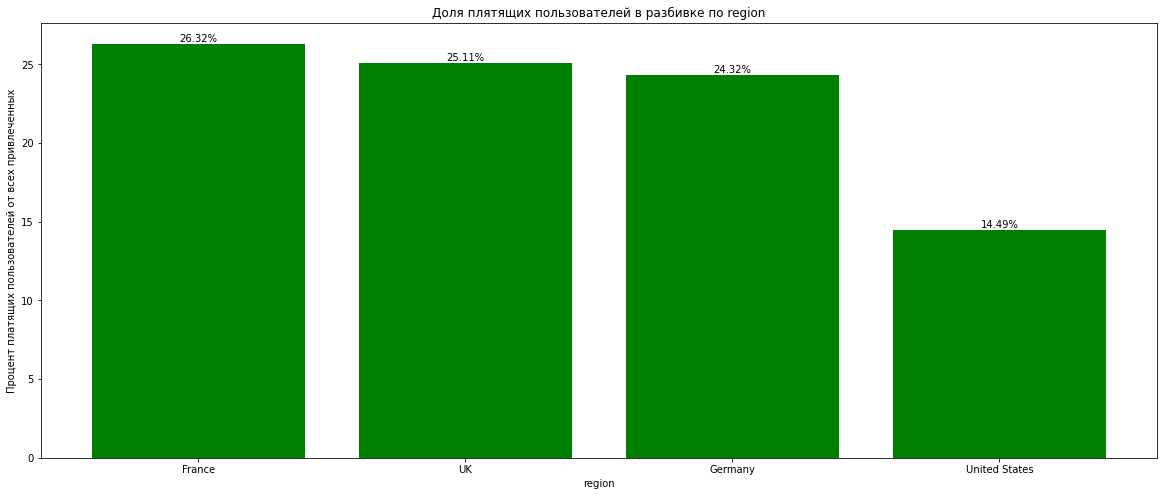

In [23]:
pivot_and_pie(profiles,'region')

**Вывод**
___
* Более 66% пользователей пришли из США они и составляют наибольшую долю платящих пользователей. 
* Количество пользователей из Франции и Британии практически одинаково около 11%, чуть меньше пользователей из Германии - менее 10%.
___

**Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**

,count_users,paying_users,share_of_paying_users (%)
device,,,
Android,35032,2050,17.088780
Mac,30042,1912,15.712343
PC,30455,1537,19.814574
iPhone,54479,3382,16.108516


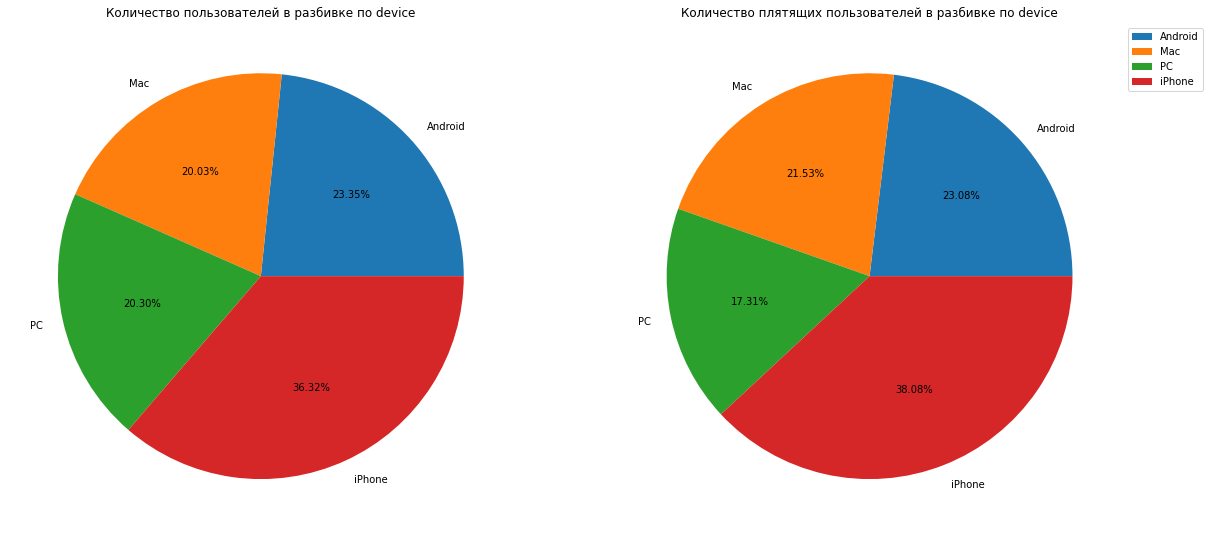

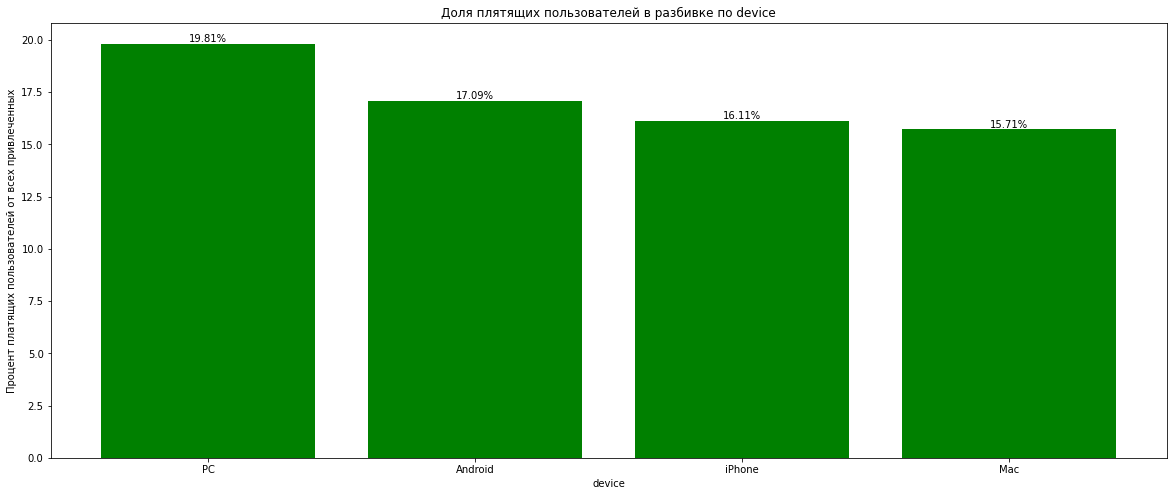

In [24]:
pivot_and_pie(profiles,'device')

**Вывод**
___
* Больше всего  пользователей с `iPhone` (36,32%). Пользователи с другими устройствами распределены равномерно их около 20-23%.
* Среди всех платящих пользователей больше всего клиентов с  iPhone - чуть более 38%.
* Процент платящих пользователей в зависимости от устройсва варьируется `от 15 до 20 процентов`, чаще всего совершают покупки пользователи с `PC`. 

**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения**

,count_users,paying_users,share_of_paying_users (%)
channel,,,
AdNonSense,3880,440,8.818182
FaceBoom,29144,3557,8.193421
LeapBob,8553,262,32.645038
MediaTornado,4364,156,27.974359
OppleCreativeMedia,8605,233,36.931330
RocketSuperAds,4448,352,12.636364
TipTop,19561,1878,10.415868
WahooNetBanner,8553,453,18.880795
YRabbit,4312,165,26.133333


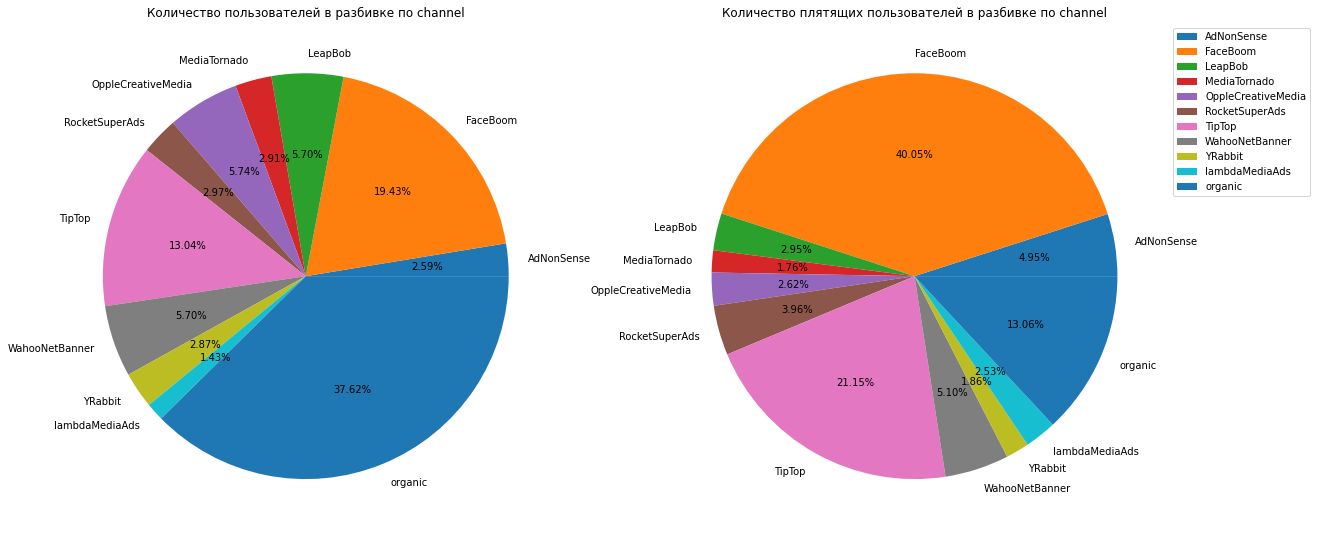

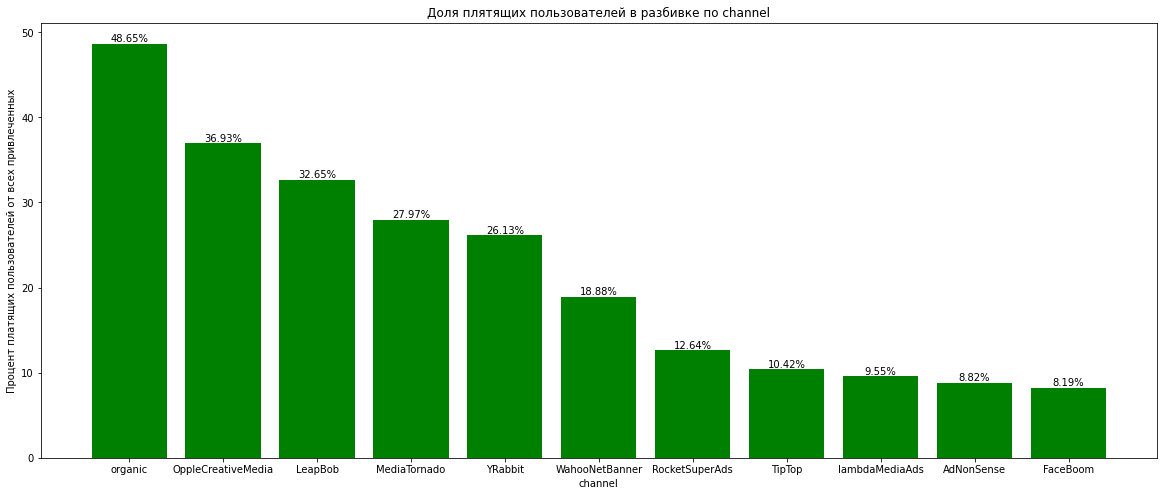

In [25]:
pivot_and_pie(profiles,'channel')

**Вывод**
___
* Больше всего пользователей приходят из  через поисковые системы - organic, и более 48% из них платящие
* С канала привлечения `FaceBoom` пришло больше всего пользователей - 19,43%. На втором месте канал `TipTop`. С остальных каналов количество пользователей от 2 до 5% от общего числа. 
* Наибольшая доля платящих пользователей у канала привлечения `OppleCreativeMedia` - `36,93%`, чуть меньше у `LeapBob`
* Меньше всего платящих пользователей у каналов `TipTop`, `lambdaMediaAds`,  `AdNonSense` и `FaceBoom` - от 10 до 8 %
___

**Общий вывод**
___
* Большую популярность приложение Procrastinate Pro+ имеет в `США`. Среди пользователей больше всего владельцев `iPhone`. 
* Клиентов, привлеченных из поисковых систем в приложении большинство, но они платят хуже, чем клиенты, привлеченные из рекламных каналов.
* Больше всего пользователей приходит с рекламного канала `FaceBoom`, однако только 8% из них делают покупку в приложении. 
___

### Маркетинг 
<a id='marketing'></a>

Посчитаем общую сумму расходов на маркетинг.

In [26]:
sum_costs = round(costs['costs'].sum(),1)
sum_costs

105497.3

Общая сумма расходов на маркетинг составила 105 497,30 $

Выясним, как траты распределены по рекламным источникам.

,costs,share_of_advertising_spend (%)
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


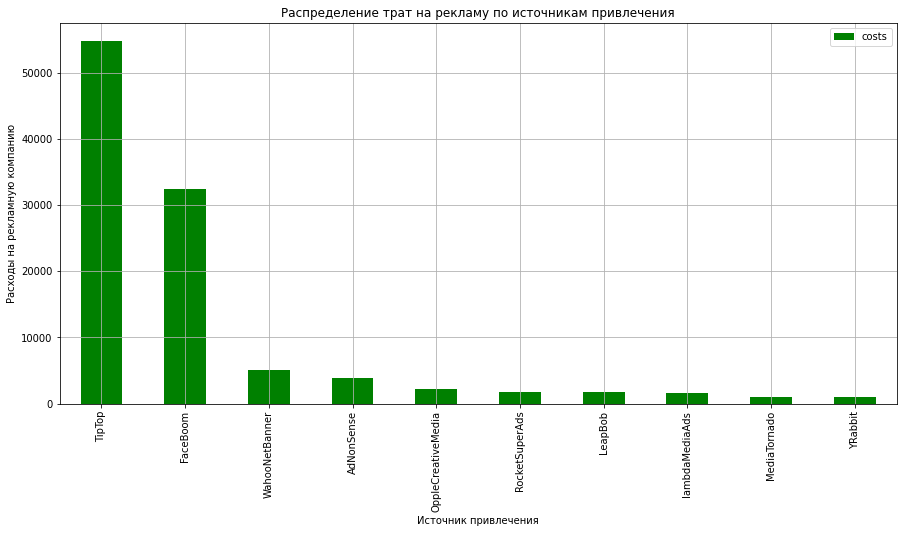

In [27]:
pivot_costs = costs.pivot_table(index='channel',
                                values='costs',
                                aggfunc='sum').sort_values(by='costs',ascending=False)

pivot_costs['share_of_advertising_spend (%)'] = pivot_costs['costs']*100/sum_costs


display(pivot_costs)
pivot_costs.plot.bar(y='costs',figsize=(15,7),color='g',grid=True)
plt.title('Распределение трат на рекламу по источникам привлечения')
plt.xlabel('Источник привлечения')
plt.ylabel('Расходы на рекламную компанию')
plt.show()

**Вывод**
___
* Больше всего бюджета было потрачено на источники `Tip Top` и `Face Boom`. По расходам на рекламу лидирует платформа Tio Top - более 50% трат на рекламу приходится на этот источник.   
* По остальным каналам сумма расходов менее 6 000 $
___

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику и визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

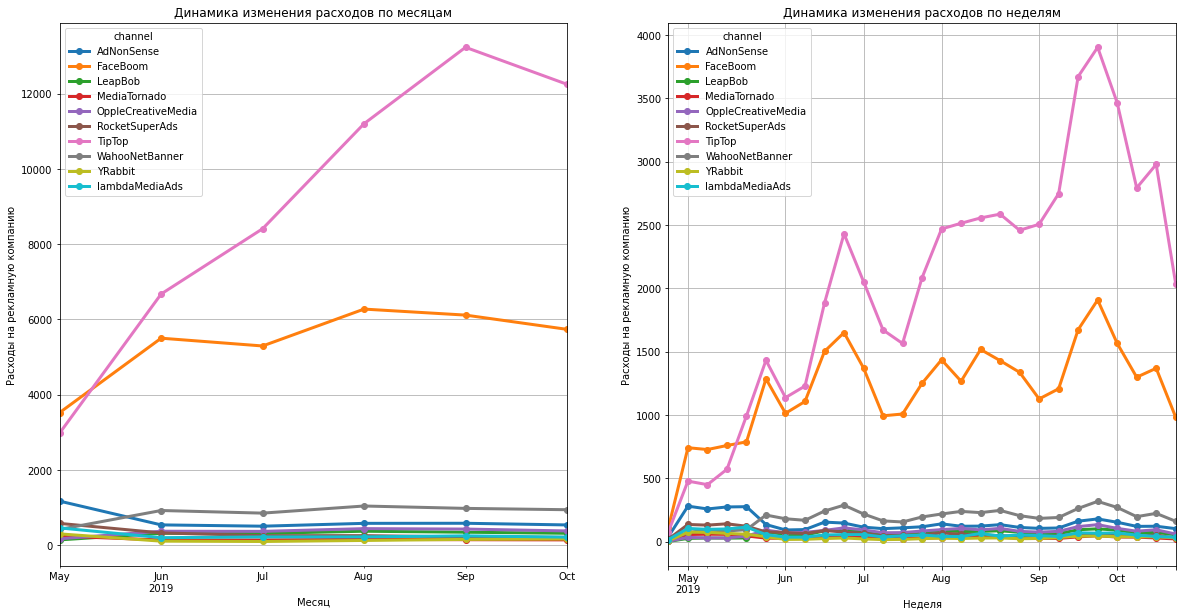

In [28]:
pivot_month = costs.pivot_table(index='month',columns='channel',values='costs',aggfunc='sum')
pivot_week = costs.pivot_table(index='week',columns='channel',values='costs',aggfunc='sum')

pivot_month.plot(figsize=(20,10),style='o-',grid=True,linewidth=3, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламную компанию')

pivot_week .plot(figsize=(20,10),style='o-',grid=True,linewidth=3, ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламную компанию')


plt.show()

Так как расходы на рекламу в источниках `Tip Top` и `Face Boom` наибольшие -  графики динамики этих источников сильно выделяются. Видно, что с мая по сентябрь расходы растут. По недельной динамики видно, что с конца сентября расходы начинают снижаться. 
Масштабируем графики, чтобы посмотреть динамику по остальным источникам.

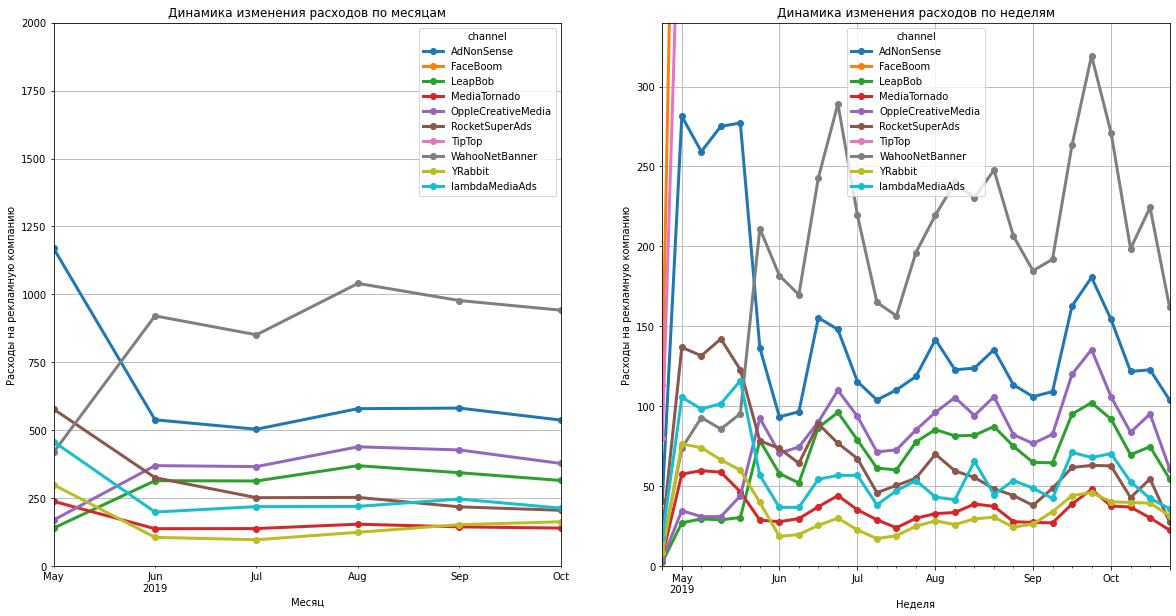

In [29]:
pivot_month.plot(figsize=(20,10),style='o-',grid=True,linewidth=3, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламную компанию')
plt.ylim(0, 2000)

pivot_week .plot(figsize=(20,10),style='o-',grid=True,linewidth=3, ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламную компанию')
plt.ylim(0, 340)


plt.show()

**Вывод**
___
* По графику динамики по месяцам видно, что расходы по источникам   `LeapBob`,  `OppleCreativeMedia`, `WahooNetBanner` - растут до августа затем наблюдается снижение. По недельному графику видно, что это связано с резким снижением расходов по данным источникам в последние недели августа. 

* К концу мая расходы по источникам  `MediaTornado`, `RocketSuperAds`,`YRabbit`,`AdNonSense` и `lambdaMediaAds` возросли, однако с конца мая по июнь сильно сократились.  

* По всем источникам с 1-ой по 3-ю недели сентября расходы сильно возросли, по сравнению с расходами за август и начало сентября, однако с 3-ей недели сентября снова наблюдается падение. 
___

**Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника**

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


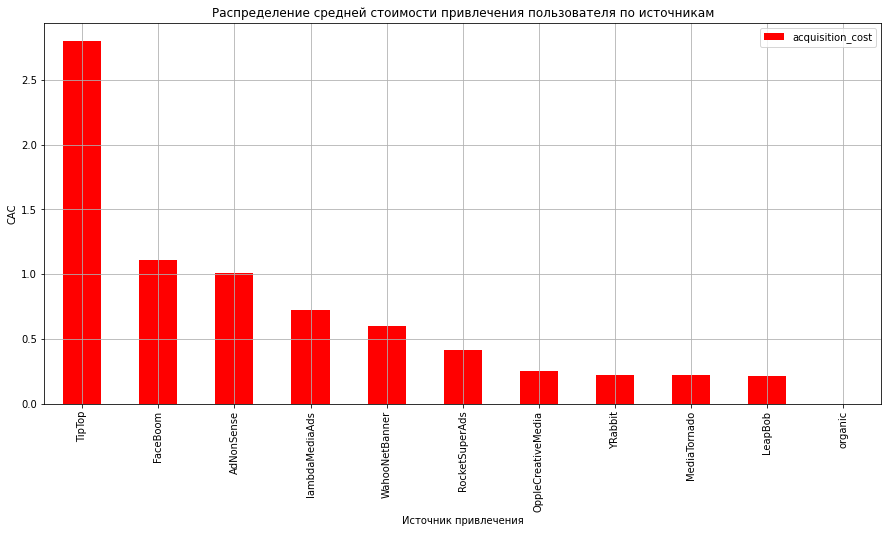

In [30]:
cac_channel = profiles.pivot_table(index='channel',
                                   values='acquisition_cost',
                                   aggfunc='mean').sort_values(by='acquisition_cost',
                                                              ascending=False)
display(cac_channel)
cac_channel.plot.bar(figsize=(15,7),color='r', grid=True)
plt.title('Распределение средней стоимости привлечения пользователя по источникам')
plt.xlabel('Источник привлечения')
plt.ylabel('CAC')
plt.show()

**Вывод**
____

* Дороже всего обходятся пользователи привлеченные с `Tip Top`, что не удивительно, на эту платформу приходится больше всего трат на рекламу. 

* Стоимость клиента привлеченного с `FaceBoom` почти в 2 раза меньше и почти равна CAC платформы `AdNonSense` около 1$. 

* Стоимость привлечения пользователей с других платформ менее 1$.
___

**Общий вывод**
___
* Больше всего расходов на рекламу приходится на источник `Tip Top`, однако стоимость привлечения пользователей гораздо больше, чем по остальным источникам. 

* Следует обратить внимание на источник  `FaceBoom`, клиенты с нее обходятся компании дешевле, так как из исследовательского анализа, видно, что по данному источнику приходит больше всего клиентов и среди них больше всего платящих. 

* Предварительно можно предположить, что убытки компании связаны с  увеличением рекламного бюджета на источник `Tip Top`. 
___

### Оценка окупаемость рекламы 
<a id='payback'></a>

В качестве момента анализа возьмем `1.11.2019`.Так как в  бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, то горизонт анализа зададим `14 дней`.

In [31]:
observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14

**Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI**

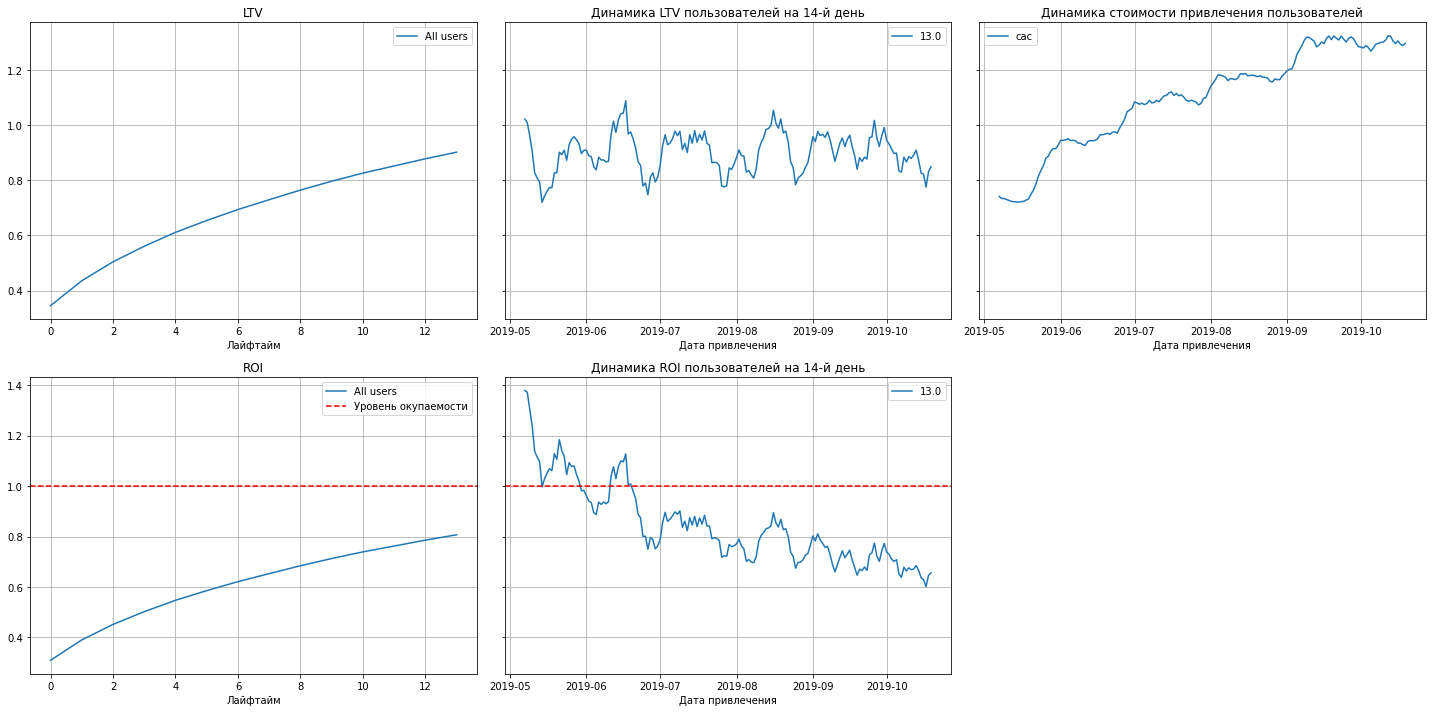

In [32]:
#исключим из анализа пользователей, привлеченных из поисковых систем
profiles_woo = profiles.query('channel != "organic" ')

ltv_roi_raw, ltv, ltv_dynamics, roi, roi_dynamics = get_ltv(profiles_woo, 
                                                           orders, 
                                                           observation_date, 
                                                           horizon_days)

plot_ltv_roi(ltv, ltv_dynamics, roi, roi_dynamics, horizon_days)



- LTV стабилен, растет от 0 до пересечения с 1. По динамике LTV видна сезонная изменчивость, но это нормально, на этот показатель влияет сезонных фактор. Значит, дело не в ухудшении качества пользователей.
- Реклама не окупается. На конец периода составляет около 80%. Так же по динамике видно, что показатель для клиентов, привлеченных в мае на конец периода, составлял более 114%, когда окупаемость клиентов, привлеченных в октябре уже менее 66%
- С динамикой стоимости привлечения клиентов тоже проблемы. Она не стабильна и возрастает для каждой следующей когорты привлеченных пользователей, что означает проблему в увеличении рекламного бюджета.

**Проверим конверсию пользователей и динамику её изменения**

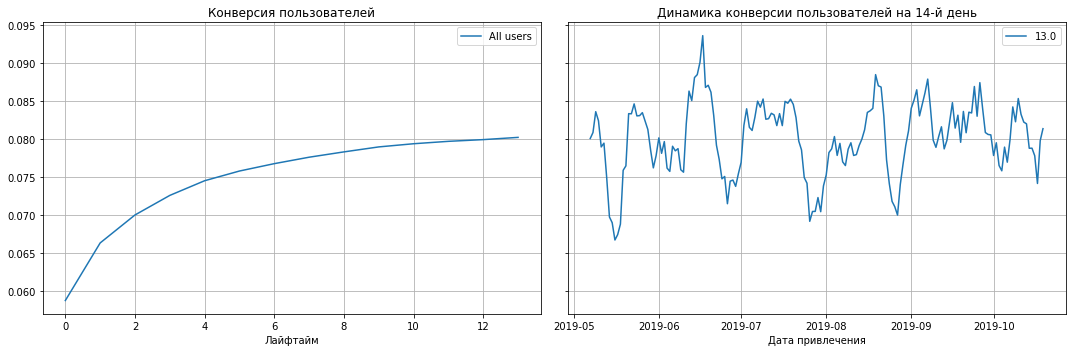

In [33]:
conv_raw, conv, conv_history = get_conversion(profiles_woo,
                                              orders,
                                              observation_date,
                                              horizon_days)
plot_conversion(conv, conv_history, horizon_days, window=7)

- График конверсии пользователей выглядит правильно - конверсия растет `от 5,8% до 8,0 %`.
- По графику динамики конверсии видно, что наибольшие значения наблюдаются для клиентов, привлеченных в июле -`более 9,2%`из них совершили покупку. Для клиентов, привлеченных позднее, конверсия варьируется `от 6,5 до 8,8%`

**Построим графики удержания**

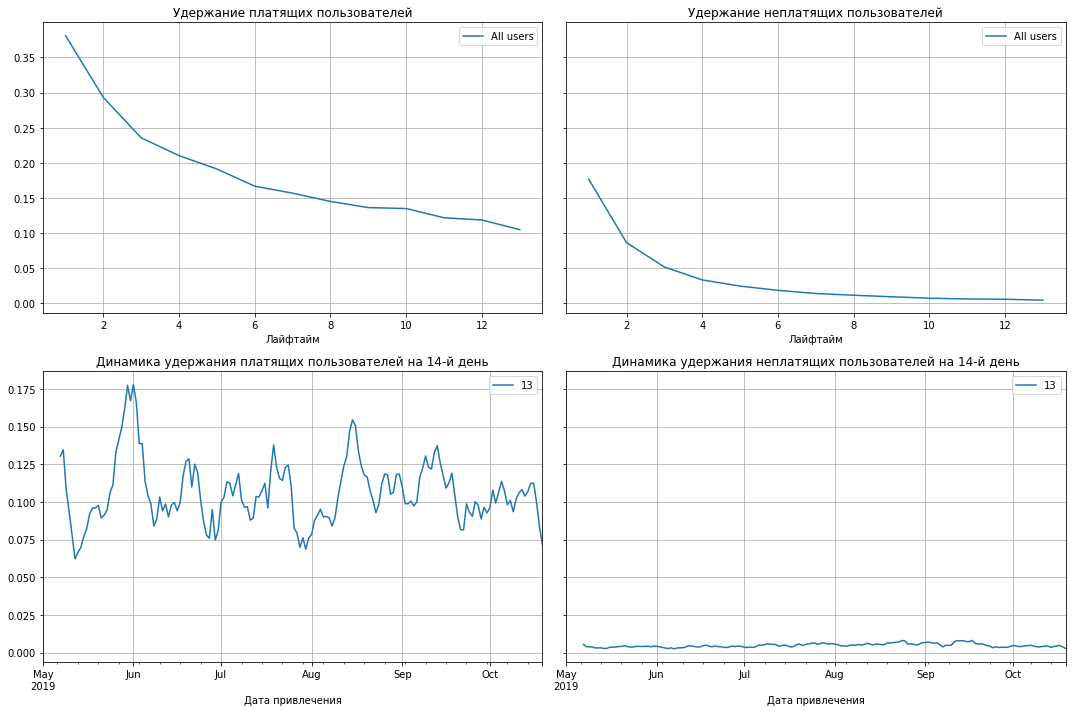

In [34]:
rr_raw, r_rate, r_rate_in_time = get_retention(profiles_woo,
                                               visits,
                                               observation_date,
                                               horizon_days)
plot_retention(r_rate, r_rate_in_time, horizon_days)


Коэффициент удержания платящих пользователей, очевидно больше не платящих на 14-ый день составляет около 10%, не платящие пользователи удерживаются плохо менее 1% воспользовались приложением повторно на конец периода.

**Вывод**
_____
Было выявлено, что причина убытков компании в окупаемости рекламных компаний - низкий показатель ROI и рост стоимости привлечения клиентов (CAC).
____

Чтобы разобраться в причинах плохой окупаемости, пройдёмся по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

**Проанализируем окупаемость рекламы с разбивкой по устройствам.** 

Построим графики LTV,ROI конверсии и удержания, а также графики динамики LTV, CAC и ROI. 

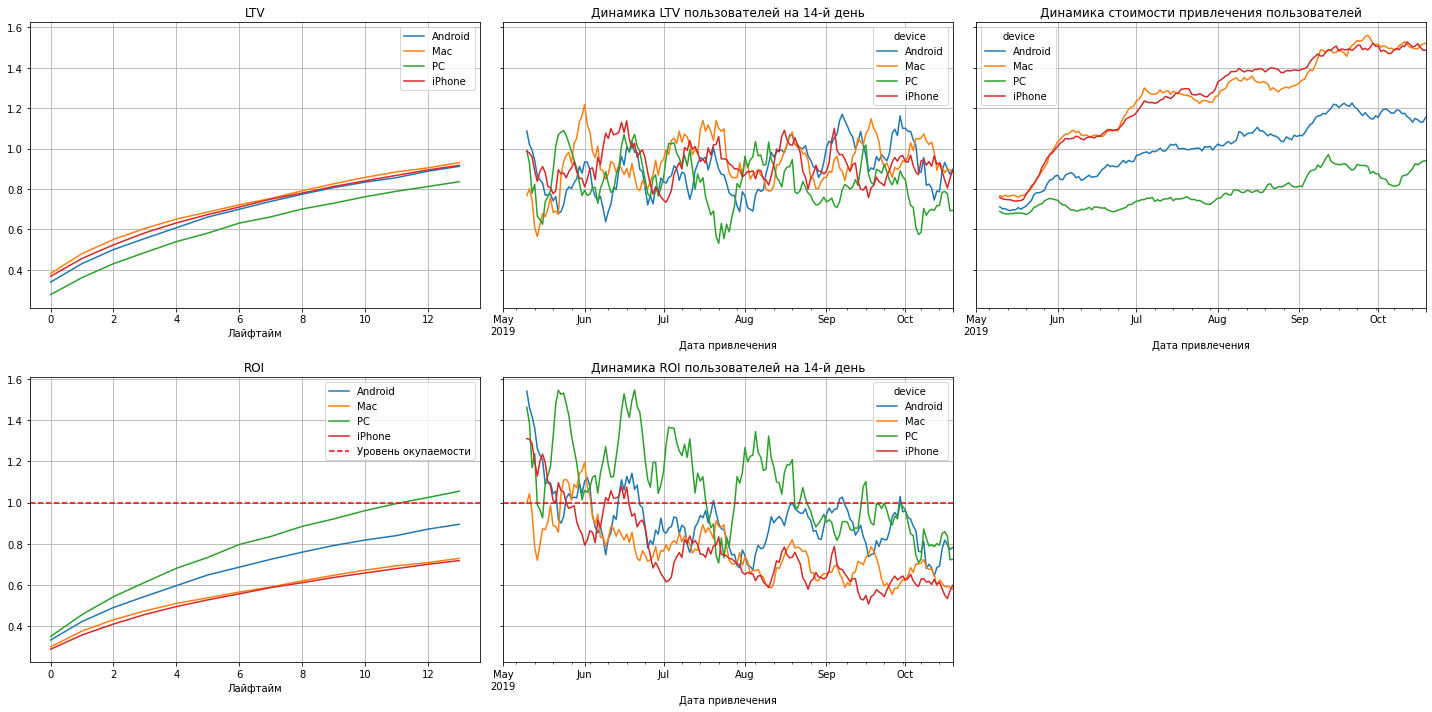

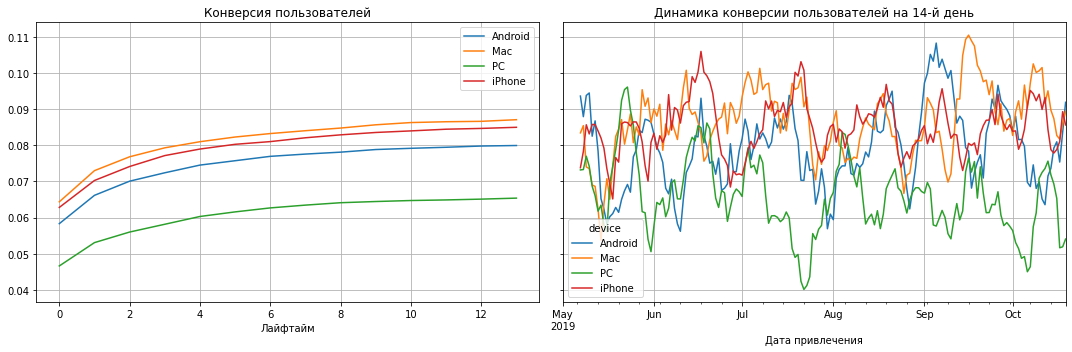

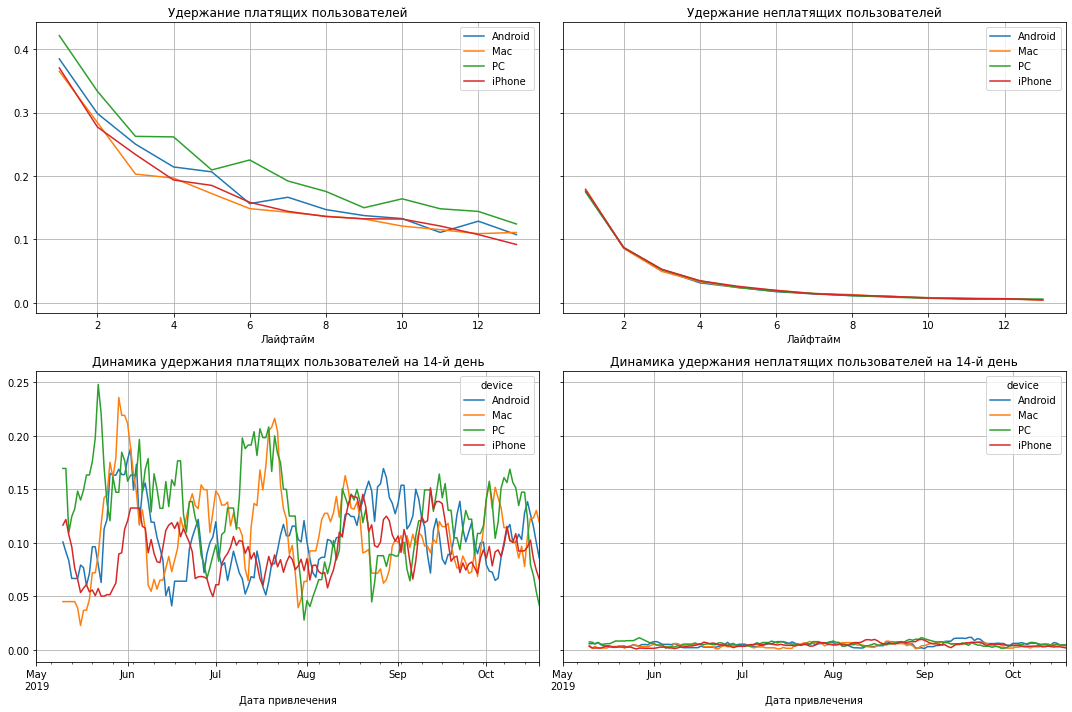

In [35]:
ltv_roi_raw_device, ltv_device, ltv_dynamics_device, roi_device, roi_dynamics_device = get_ltv(profiles_woo, 
                                                           orders, 
                                                           observation_date, 
                                                           horizon_days,
                                                           dimensions=['device'])

plot_ltv_roi(ltv_device, ltv_dynamics_device, roi_device, roi_dynamics_device, horizon_days,window=10)


#Конверсия
conv_raw_device, conv_device, conv_history_device = get_conversion(profiles_woo,
                                              orders,
                                              observation_date,
                                              horizon_days,dimensions=['device'])
plot_conversion(conv_device, conv_history_device, horizon_days, window=7)


#Удержание
rr_raw_device, r_rate_device, r_rate_in_time_device= get_retention(profiles_woo,
                                               visits,
                                               observation_date,
                                               horizon_days,dimensions=['device'])
plot_retention(r_rate_device, r_rate_in_time_device, horizon_days,window=10)

* LTV стабилен для всех устройств, но хуже всего для пользователей с PC.

* По анализу показателя ROI окупаются только пользователи с PC

* Рост стоимости привлечения наблюдается для всех устройств. Так как CAC одинаково нестабилен для всех устройств можем сказать, что проблема окупаемости не в устройстве.

* Наименьшая конверсия наблюдается у пользователей с PC на конец периода только 6,5 процентов из них совершают покупку

* Графики держания для всех устройств имею практически один вид, удержание пользователей с PC чуть выше, чем у других устройств. 

**Проанализируем окупаемость рекламы с разбивкой по странам**

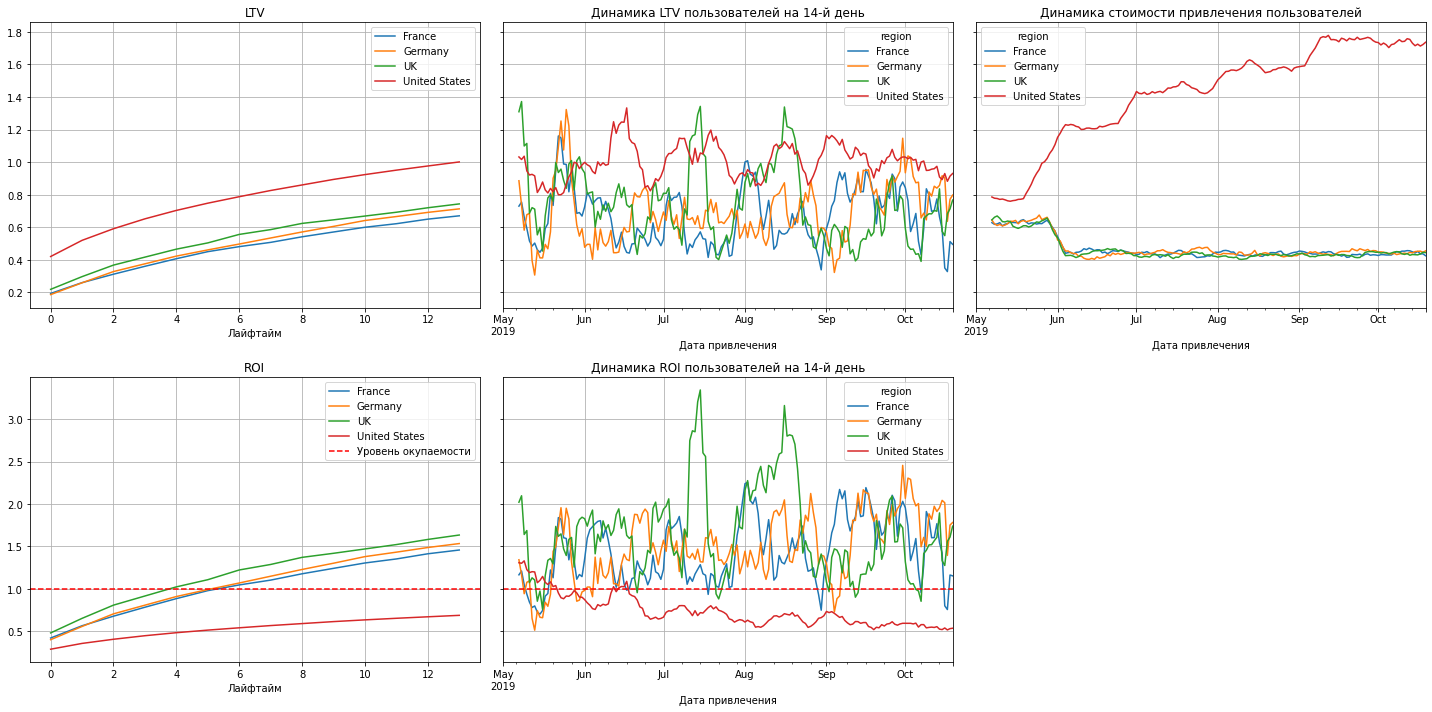

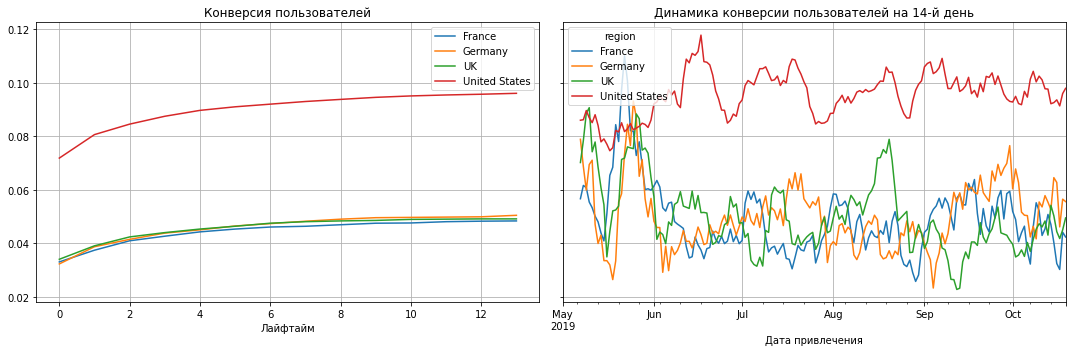

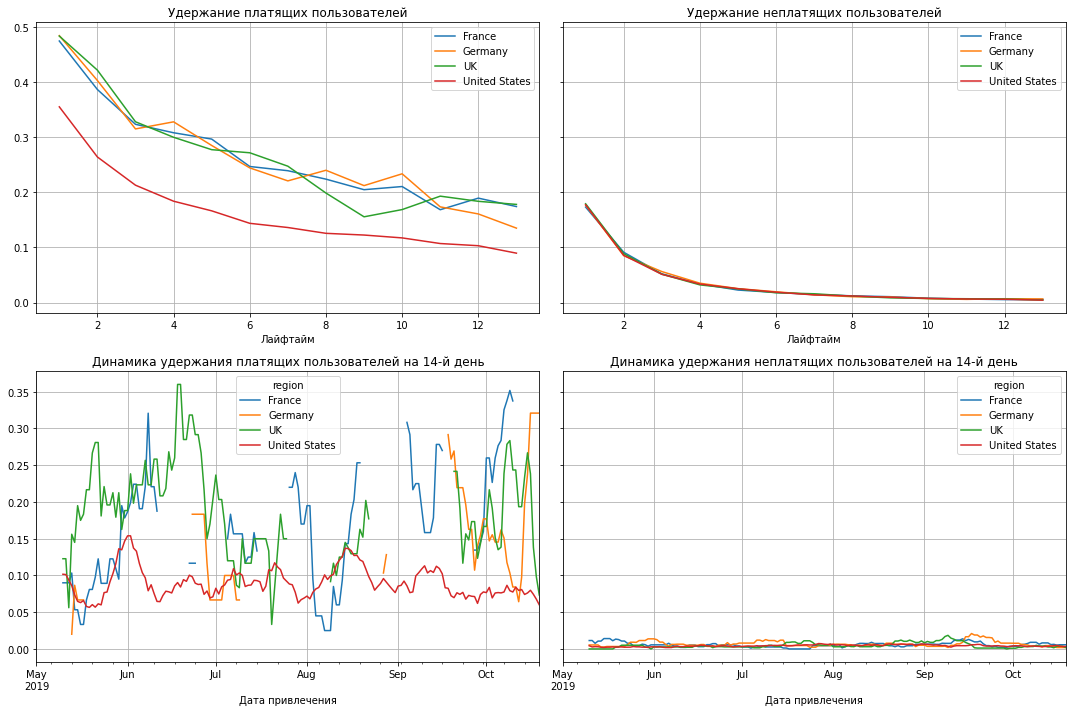

In [36]:
ltv_roi_raw_region, ltv_region, ltv_dynamics_region, roi_region, roi_dynamics_region = get_ltv(profiles_woo, 
                                                           orders, 
                                                           observation_date, 
                                                           horizon_days,
                                                           dimensions=['region'])

plot_ltv_roi(ltv_region, ltv_dynamics_region, roi_region, roi_dynamics_region, horizon_days)

#Конверсия
conv_raw_region, conv_region, conv_history_region = get_conversion(profiles_woo,
                                              orders,
                                              observation_date,
                                              horizon_days,dimensions=['region'])
plot_conversion(conv_region, conv_history_region, horizon_days, window=7)


#Удержание
rr_raw_region, r_rate_region, r_rate_in_time_region = get_retention(profiles_woo,
                                               visits,
                                               observation_date,
                                               horizon_days,dimensions=['region'])
plot_retention(r_rate_region, r_rate_in_time_region, horizon_days,window=10)

* Реклама не окупается для пользователей из США. 
* Так же виден  сильный рост стоимости привлечения для пользователей из США для когорт пользователей привлеченных в середине мая и позднее. Для пользователей из других регионов, начиная с привлеченных в конце мая, CAC понизился и до конца анализируемого периода стабилен. 
* При этом по графику LTV видно, что именно клиенты из США больше всего приносят денег компании, также у них самая высокая конверсия.
* А вот удержание пользователей из США ниже, чем у клиентов из других регионов
* Лучше всего окупаются пользователи из Великобритании

**Проанализируем окупаемость рекламы с разбивкой по рекламным каналам**

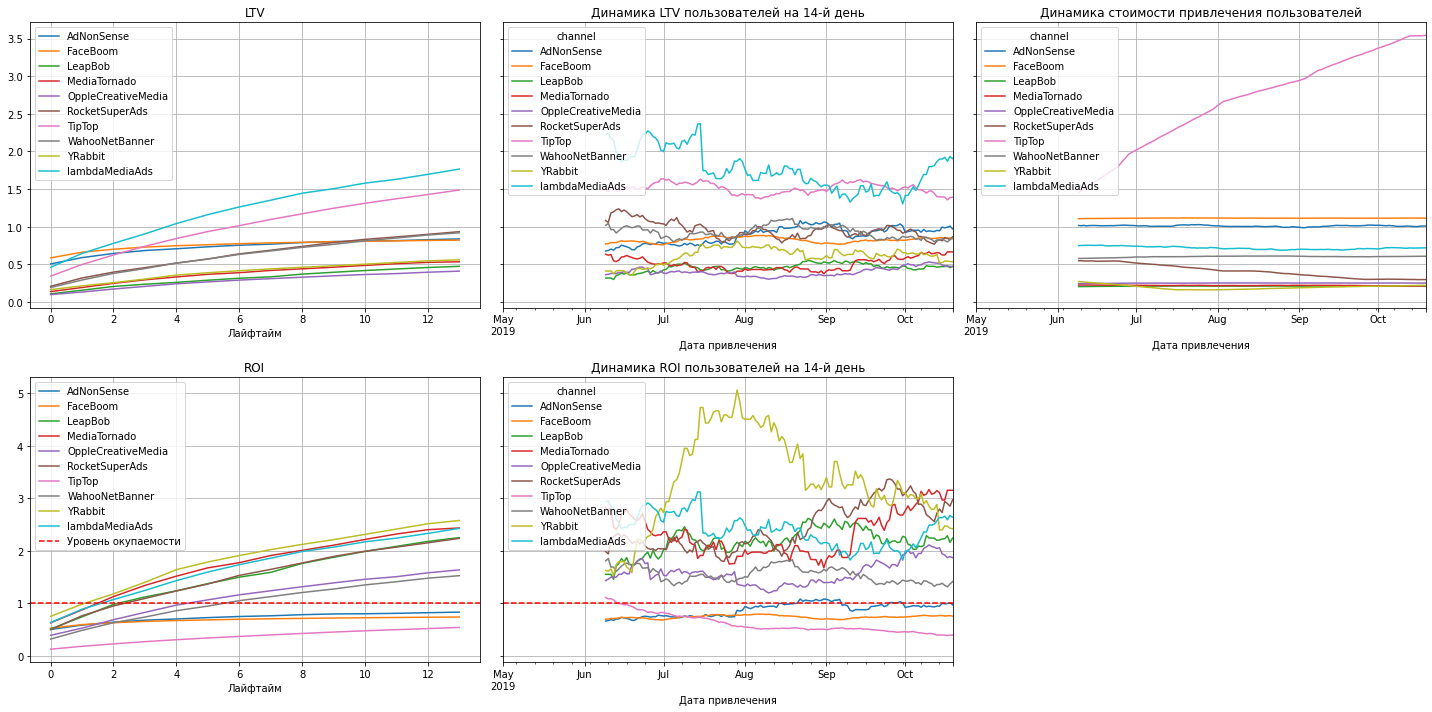

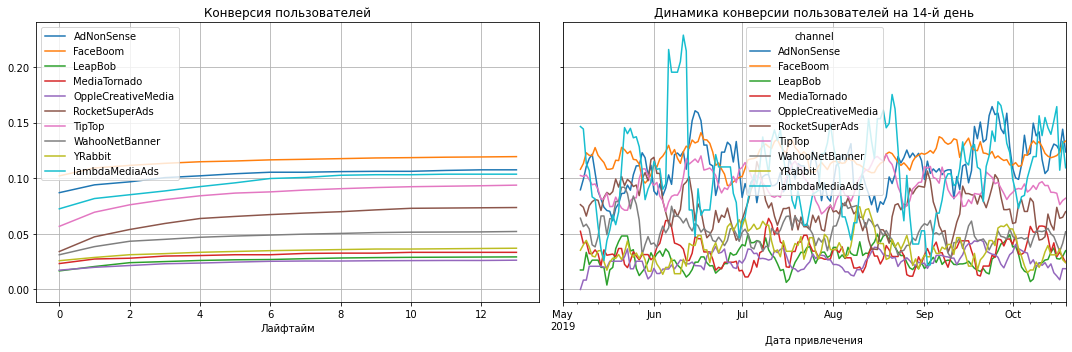

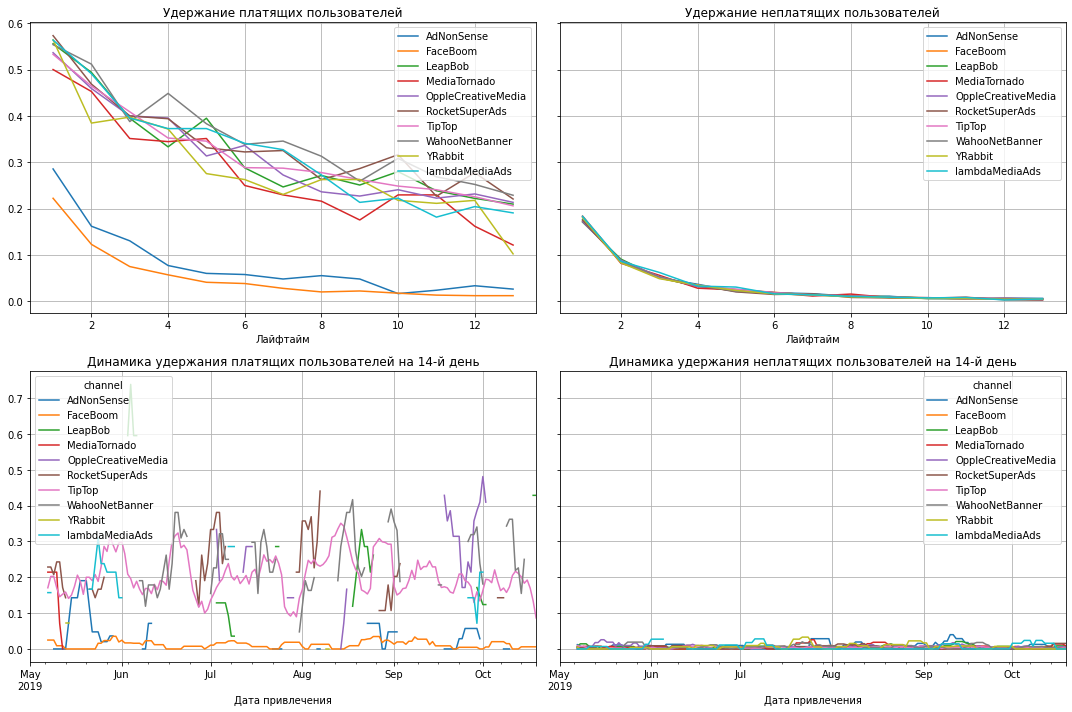

In [37]:
ltv_roi_raw_channel, ltv_channel, ltv_dynamics_channel, roi_channel, roi_dynamics_channel = get_ltv(profiles_woo, 
                                                           orders, 
                                                           observation_date, 
                                                           horizon_days,
                                                           dimensions=['channel'])

plot_ltv_roi(ltv_channel, ltv_dynamics_channel, roi_channel, roi_dynamics_channel, horizon_days, window=40)

#Конверсия
conv_raw_channel, conv_channel, conv_history_channel = get_conversion(profiles_woo,
                                              orders,
                                              observation_date,
                                              horizon_days,dimensions=['channel'])
plot_conversion(conv_channel, conv_history_channel, horizon_days, window=7)


#Удержание
rr_raw_channel, r_rate_channel, r_rate_in_time_channel = get_retention(profiles_woo,
                                               visits,
                                               observation_date,
                                               horizon_days,dimensions=['channel'])
plot_retention(r_rate_channel, r_rate_in_time_channel, horizon_days)

* Убыточные рекламные источники `Tip Top`, `AdNonSense` и `FaceBoom` при этом для источника `Tip Top` наблюдается рост стоимости привлечения, когда для остальных источников CAC относительно стабилен
* Лучше всего окупаются пользователи из `YRabbit`
* Наибольшая конверсия у пользователей привлеченных с `FaceBoom`, однако у пользователей с этого канала, а также с канала `AdNonSense` наименьшее удержание - к концу второй недели менее 5% пользователей воспользовались приложением повторно.

**Вывод**

- В целом было выявлено, что реклама на привлечение пользователей не окупается. 
- Негативное влияние на окупаемость рекламы влияют пользователи, привлеченные в `США` и с рекламного канала `Tip Top`
- Проблемы окупаемости могут быть вызваны увеличением расходов на рекламу на канале `Tip Top` в США


Проверим гипотезу о том, что убытки компании связаны с окупаемостью пользователей с различных источников и в разбивке по регионам. Посчитаем сколько пользователей в каждой стране было привлечено из различных рекламных источников.

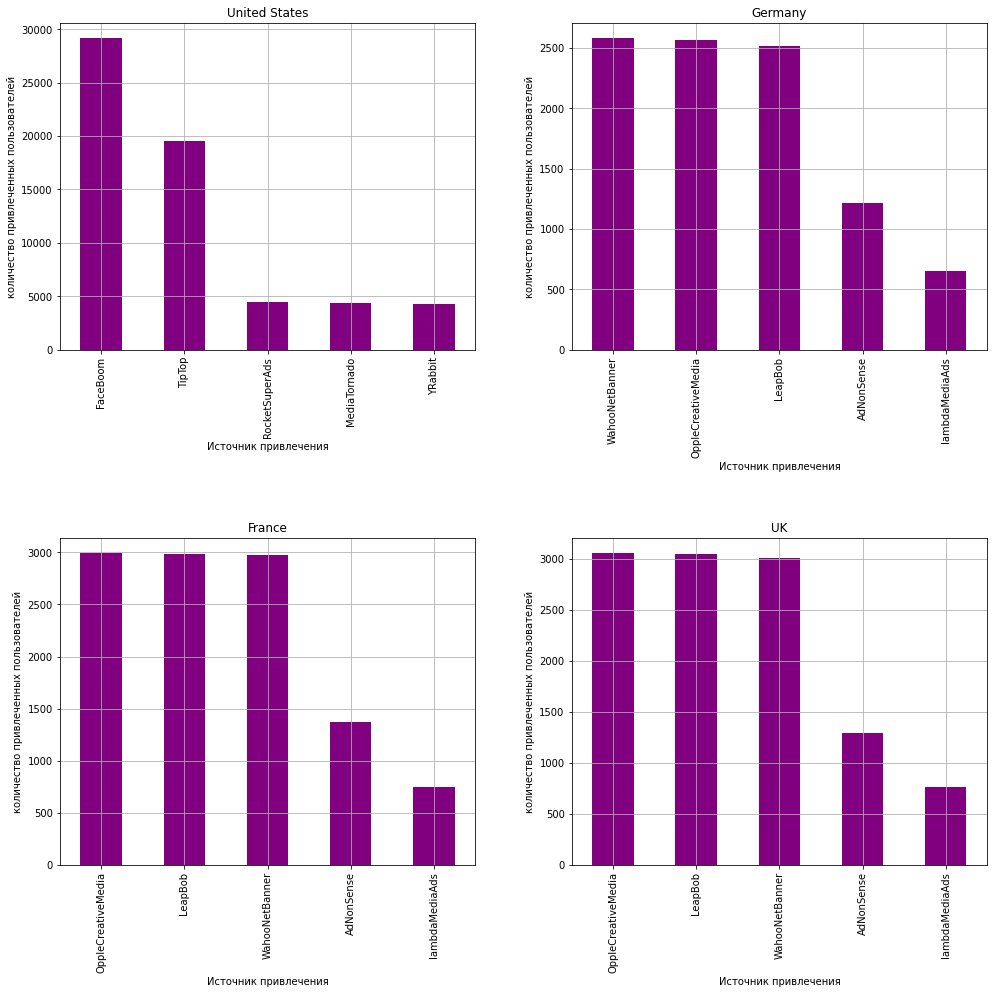

In [38]:
plt.figure(figsize=(15,15))
for s in enumerate(profiles_woo['region'].unique()):
    for reg in profiles_woo['region'].unique():
        if s[1] == reg:
            ax1 = plt.subplot(2, 2, s[0]+1)
            profiles_woo.query('region == @reg')['channel'].value_counts().plot.bar(grid=True,color='purple')
            plt.title(reg)
            plt.xlabel('Источник привлечения')
            plt.ylabel('количество привлеченных пользователей')
            plt.tight_layout(pad=5)

* Наиболее популярный источник привлечения для пользователей из США это `FaceBoom`
* Для остальных регионов самыми популярными источниками являются `WahooNetBanner`, `LeapBob`, `OppleCreativeMedia`

### Общий вывод 
<a id='results'></a>
**Причины неэффективности привлечения пользователей**

Главная причина неэффективности привлечения пользователей в слишком больших расходах на рекламу в источнике `Tip Top`. Было выявлено, что наибольшее число платящих пользователей находятся в США и наибольшее количество пользователей из этого региона приходят в приложение из источника `FaceBoom`. 

Стоимость клиента привлеченного с `FaceBoom` почти в 2 раза меньше, чем у `Tip Top` и почти равна CAC платформы AdNonSense, не смотря на значительную разницу в расходах на рекламу по данным источникам.

**Рекомендации для отдела маркетинга**
- Уменьшить расходы на рекламу с канала `Tip Top` для пользователей США - пользователи привлеченные с этого канала не окупаются.
- Канал привлечения `FaceBoom` более прибыльный для этого региона
